In [8]:
#Importing Necessary Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats as stats

## Binomial Distribution
### Problem statement
### 80% of all the visitors to Lavista Museum end up buying souvenirs from the souvenir shop at the Museum. On the coming Sunday, if a random sample of 10 visitors is picked:
#### 1. Find the probability that every visitor will end up buying from the souvenir shop
#### 2. Find the probability that a maximum of 7 visitors will buy souvenirs from the souvenir shop
### Let's check first whether we satisfy the assumptions of the binomial distribution.
* There are only two possible outcomes (success or failure) for each trial. A visitor will buy souvenirs from the souvenir shop or not (yes or no).
* Number of trials (n) is fixed - There are IO visitors in the sample.
* Each trial is independent of the other trials - It is reasonable to assume that the buying activity of visitors is independent.
  
### The probability of success (p) is the same for each trial - The probability of success for each visitor is 0.8.

In [9]:
# Binomial Distributon
# Given data
n = 10  # Number of trials
p = 0.8  # Probability of success (buying souvenir)

#1. Probability that every visitor buys a souvenir (X = 10)
prob_all_buy = stats.binom.pmf(10, n, p)
print(f"Probability that every visitor buys a souvenir: {prob_all_buy:.5f}\n")

#2. Probability that a maximum of 7 visitors buy souvenirs (X <= 7)
prob_max_7_buy = stats.binom.cdf(7, n, p)
print(f"Probability that a maximum of 7 visitors buy souvenirs: {prob_max_7_buy:.5f}")


Probability that every visitor buys a souvenir: 0.10737

Probability that a maximum of 7 visitors buy souvenirs: 0.32220


### Continuous Uniform Distribution
### Problem statement
#### IT industry records the amount of time a software engineer needs to fix a bug in the initial phase of software development in 'debugging.csv•.
#### Let
#### X = Time needed to fix bugs

#### X is a continuous random variable. Let's see the distribution of X and answer the below questions.
* 1. Find the probability that a randomly selected software debugging requires less than three
hours
* 2. Find the probability that a randomly selected software debugging requires more than two
hours
* 3. Find the 50th percentile of the software debugging time

In [10]:
# Continuous Uniform Distribution
#Importing the dataset and displaying
debug=pd.read_csv("debugging.csv")
debug.head

<bound method NDFrame.head of       Bug ID  Time Taken to fix the bug
0      12986                       2.42
1      12987                       2.03
2      12988                       2.74
3      12989                       3.21
4      12990                       3.40
...      ...                        ...
2093   15079                       4.17
2094   15080                       1.05
2095   15081                       2.50
2096   15082                       2.85
2097   15083                       2.64

[2098 rows x 2 columns]>

In [11]:
# Extract debugging times (assuming the column is named 'Time')
debugging_times = debug['Time Taken to fix the bug']

# Get the minimum and maximum times for uniform distribution parameters
a = debugging_times.min()
b = debugging_times.max()

# 1. Probability that debugging takes less than 3 hours (P(X < 3))
prob_less_than_3 = stats.uniform.cdf(3, loc=a, scale=b-a)
print(f"Probability that debugging takes less than 3 hours: {prob_less_than_3:.5f}\n")

# 2. Probability that debugging takes more than 2 hours (P(X > 2))
prob_more_than_2 = 1 - stats.uniform.cdf(2, loc=a, scale=b-a)
print(f"Probability that debugging takes more than 2 hours: {prob_more_than_2:.5f}\n")

# 3. 50th percentile (median of debugging time)
percentile_50 = stats.uniform.ppf(0.5, loc=a, scale=b-a)
print(f"50th percentile of debugging time: {percentile_50:.5f}\n")

Probability that debugging takes less than 3 hours: 0.49875

Probability that debugging takes more than 2 hours: 0.75188

50th percentile of debugging time: 3.00500



### Normal Distribution
### Problem statement
#### A testing agency wants to analyze the complexity of SAT Exam 2020. They have collected the SAT scores of 1000 students in "sat_score.csv". Let's answer some of the questions that will help to decide the complexity of SAT exam 2020.
* 1. Calculate the probability that a student will score less than 800 in SAT exam
* 2. Calculate the probability that a student will score more than 1300 in SAT exam
* 3. Calculate the minimum marks a student must score in order to secure 90th percentile
* 4. Calculate the minimum marks a student must score in order to be in the top 5%

In [12]:
# Normal Distribution 
# Loading the dataset
score = pd.read_csv("sat_score.csv")
score.head()

,student_id,score
0,1,1018
1,2,1218
2,3,611
3,4,723
4,5,541


In [13]:
# Extract the SAT scores (assuming the column is named 'Score')
sat_scores = score['score']

# Calculate the mean and standard deviation of SAT scores
mean_score = np.mean(sat_scores)
std_dev = np.std(sat_scores)

# 1. Probability that a student scores less than 800
prob_less_than_800 = stats.norm.cdf(800, loc=mean_score, scale=std_dev)
print(f"Probability of scoring less than 800: {prob_less_than_800:.5f}\n")

# 2. Probability that a student scores more than 1300
prob_more_than_1300 = 1 - stats.norm.cdf(1300, loc=mean_score, scale=std_dev)
print(f"Probability of scoring more than 1300: {prob_more_than_1300:.5f}\n")

# 3. Minimum marks to secure 90th percentile
score_90th_percentile = stats.norm.ppf(0.9, loc=mean_score, scale=std_dev)
print(f"Minimum score to be in the 90th percentile: {score_90th_percentile:.2f}\n")

# 4. Minimum marks to be in the top 5%
score_top_5_percent = stats.norm.ppf(0.95, loc=mean_score, scale=std_dev)
print(f"Minimum score to be in the top 5%: {score_top_5_percent:.2f}\n")

Probability of scoring less than 800: 0.15497

Probability of scoring more than 1300: 0.07611

Minimum score to be in the 90th percentile: 1269.31

Minimum score to be in the top 5%: 1343.54



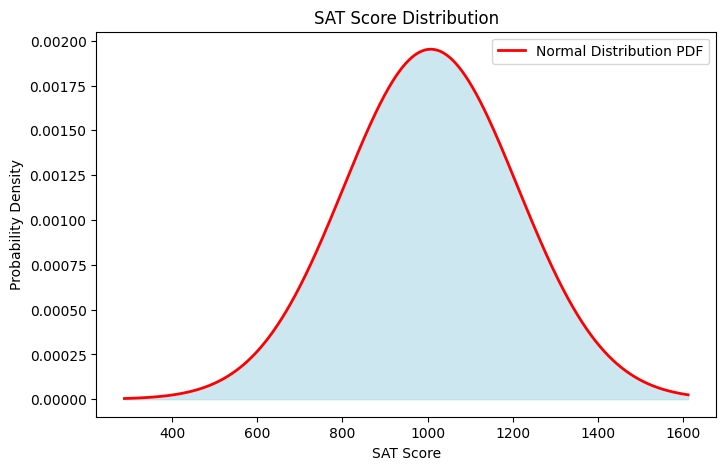

In [14]:
# Plotting the SAT score distribution
x = np.linspace(min(sat_scores), max(sat_scores), 1000)
pdf = stats.norm.pdf(x, loc=mean_score, scale=std_dev)

plt.figure(figsize=(8, 5))
plt.plot(x, pdf, 'r-', lw=2, label='Normal Distribution PDF')
plt.fill_between(x, pdf, color='lightblue', alpha=0.6)
plt.title('SAT Score Distribution')
plt.xlabel('SAT Score')
plt.ylabel('Probability Density')
plt.legend()
plt.show()